In [99]:
# !pip install tweepy
# !pip install textblob
# !pip install spacy

You should consider upgrading via the '/Users/justinlim/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/justinlim/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 10.2 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 177 kB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 969 kB 5.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/justinlim/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


# COVID-19 Vaccine Twitter Sentiment Analysis

Question: How do people in Twitter think about the recent COVID-19 vaccine?

Steps to take:
1. Scrap data from Twitter
2. Clean data
3. Exploratory Data Analysis
4. Sentiment Analysis
5. Insights

In [7]:
%matplotlib inline
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from textblob import TextBlob
from pprint import pprint
import os
import re
import string
import glob
import getpass

## Data Collection

Scraping tweets using tweepy

In [10]:
CONSUMER_KEY = getpass.getpass('Enter Consumer Key: ')
CONSUMER_SECRET = getpass.getpass('Enter Consumer Secret: ')
ACCESS_TOKEN = getpass.getpass('Enter Access Token: ')
ACCESS_TOKEN_SECRET = getpass.getpass('Enter Access Secret: ')

Enter Consumer Key: ········
Enter Consumer Secret: ········
Enter Access Token: ········
Enter Access Secret: ········


In [11]:
listener = StreamListener()
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
def scrape_tweets_to_csv(keywords, date_since, numTweets, numRuns):
    # create a main dataframe to store data
    tweets_df = pd.DataFrame(columns=['username', 'following', 'followers', 'totaltweets', 
                                      'tweetcreated', 'retweetcount', 'text', 'hashtags'])
    # initiate time to keep track of time of entire scraping
    program_start = time.time()
    for i in range(0, numRuns):
        start_run = time.time()
        tweets = tweepy.Cursor(api.search, q=keywords, lang='en', 
                               since=date_since, tweet_mode='extended').items(numTweets)
        tweet_list = [tweet for tweet in tweets]
        
        # keep track of tweets collected
        noTweets = 0
        # pull values
        for tweet in tweet_list:
            username = tweet.user.screen_name
            following = tweet.user.friends_count
            followers = tweet.user.followers_count
            totaltweets = tweet.user.statuses_count
            tweetcreated = tweet.created_at
            retweetcount = tweet.retweet_count
            hashtags = tweet.entities['hashtags']
            try:
                text = tweet.retweeted_status.full_text
            # not a retweet
            except AttributeError:
                text = tweet.full_text
            new_tweet = [username, following, followers, totaltweets, tweetcreated, retweetcount, text, hashtags]
            # append to main dataframe
            tweets_df.loc[len(tweets_df)] = new_tweet
            
            noTweets += 1
        end_run = time.time()
        # duration of each run
        run_duration = round((end_run-start_run)/60, 2)
        print('Number of tweets scraped for {} run is {}'.format(i+1, noTweets))
        print('Duration of {} run is {}'.format(i+1, run_duration))
        time.sleep(920)
    # current timestamp
    timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')
    # convert to csv
    path = os.getcwd()
    filename = path + '/data/' + timestamp + '_vaccines_tweets.csv'
    tweets_df.to_csv(filename, index=False)
    
    # program ends
    program_end = time.time()
    program_duration = round((program_end-program_start)/60, 2)
    print('Scraping Complete')
    print('Duration of the program: {}'.format(program_duration))

In [364]:
keywords = '#coronavaccines'
date_since = '2021-01-13'
tweets = tweepy.Cursor(api.search, q=keywords, lang='en', since=date_since, tweet_mode='extended').items(5)
tweet_list = [tweet for tweet in tweets]
# for tweet in tweet_list:
#     print(tweet.created_at)
tweet_list[0].__dict__

{'_api': <tweepy.api.API at 0x7fa84141c4d0>,
 '_json': {'created_at': 'Sat Jan 16 12:03:35 +0000 2021',
  'id': 1350413386161524736,
  'id_str': '1350413386161524736',
  'full_text': 'https://t.co/pivOh01xon\n\nCoronavirus conspiracy theories could keep people from getting vaccinated if left unaddressed.\n\n#CoronaVaccines https://t.co/Ic6GWbjeUJ',
  'truncated': False,
  'display_text_range': [0, 136],
  'entities': {'hashtags': [{'text': 'CoronaVaccines', 'indices': [121, 136]}],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/pivOh01xon',
     'expanded_url': 'https://www.businessinsider.com/8-coronavirus-vaccine-myths-debunked-from-microchipping-to-mandates-2020-12?r=US&IR=T',
     'display_url': 'businessinsider.com/8-coronavirus-…',
     'indices': [0, 23]}],
   'media': [{'id': 1350413241017659394,
     'id_str': '1350413241017659394',
     'indices': [137, 160],
     'media_url': 'http://pbs.twimg.com/media/Er2hsBrXcAI3K__.jpg',
     'media_url_https

In [82]:
# initialize variables
keywords = '#vaccines OR #coronavaccines OR vaccines OR covid19+vaccines'
date_since = '2021-01-15'
numTweets = 2500
numRuns = 6

# call the function
scrape_tweets_to_csv(keywords, date_since, numTweets, numRuns)

Number of tweets scraped for 1 run is 2500
Duration of 1 run is 9.33
Number of tweets scraped for 2 run is 2500
Duration of 2 run is 1.62
Number of tweets scraped for 3 run is 2500
Duration of 3 run is 1.68
Number of tweets scraped for 4 run is 2500
Duration of 4 run is 1.86
Number of tweets scraped for 5 run is 2500
Duration of 5 run is 1.86
Number of tweets scraped for 6 run is 2500
Duration of 6 run is 2.05
Scraping Complete
Duration of the program: 110.42


In [268]:
# initialize variables
keywords = '#vaccines OR #coronavaccines OR vaccines OR covid19+vaccines'
date_since = '2021-01-16'
numTweets = 2500
numRuns = 6

# call the function
scrape_tweets_to_csv(keywords, date_since, numTweets, numRuns)

Number of tweets scraped for 1 run is 2500
Duration of 1 run is 1.74
Number of tweets scraped for 2 run is 2500
Duration of 2 run is 1.82
Number of tweets scraped for 3 run is 2500
Duration of 3 run is 1.88
Number of tweets scraped for 4 run is 2500
Duration of 4 run is 1.94
Number of tweets scraped for 5 run is 2500
Duration of 5 run is 2.03
Number of tweets scraped for 6 run is 2500
Duration of 6 run is 2.04
Scraping Complete
Duration of the program: 103.47


In [478]:
# initialize variables
keywords = '#vaccines OR #coronavaccines OR vaccines OR covid19+vaccines'
date_since = '2021-01-17'
numTweets = 2500
numRuns = 6

# call the function
scrape_tweets_to_csv(keywords, date_since, numTweets, numRuns)

Number of tweets scraped for 1 run is 2500
Duration of 1 run is 1.62
Number of tweets scraped for 2 run is 2500
Duration of 2 run is 1.67
Number of tweets scraped for 3 run is 2500
Duration of 3 run is 1.79
Number of tweets scraped for 4 run is 2500
Duration of 4 run is 1.89
Number of tweets scraped for 5 run is 2500
Duration of 5 run is 1.94
Number of tweets scraped for 6 run is 2500
Duration of 6 run is 1.97
Scraping Complete
Duration of the program: 102.89


In [6]:
# load all csv and create a dataframe
data_path = os.getcwd() + '/data/'
filenames = glob.glob(data_path + '/*.csv')
base_list = []
for filename in filenames:
    base_list.append(pd.read_csv(filename))

base_df = pd.concat(base_list, ignore_index = True)
print(base_df.shape)

(45000, 8)


In [7]:
base_df.head()

,username,following,followers,totaltweets,tweetcreated,retweetcount,text,hashtags
0,KittyKunoichi,275,43,3901,2021-01-17 16:33:50,1705,"As more #COVID19 vaccine becomes available, mo...","[{'text': 'COVID19', 'indices': [20, 28]}]"
1,reillyd123,239,11,3158,2021-01-17 16:33:49,0,@standardnews @EveningStandard In the history ...,[]
2,RAJESH21490629,236,29,14211,2021-01-17 16:33:48,735,India is the vaccine hub of the world. We have...,[]
3,CG_Cynic,950,355,33807,2021-01-17 16:33:47,4,The sunk costs of failed plans devised by larg...,[]
4,NayayoungIndia,1145,1459,449459,2021-01-17 16:33:47,223,India's ready to prove it's a Covid-19 vaccina...,[]


## Data Cleaning

Initial cleaning:
- Lower case
- Remove punctuations
- Remove tags (e.g. @username)
- Remove line break (\n)
- Remove URLs in the tweet
- Remove words with numbers in between characters
- Remove words that start with a number (e.g. 10queues)

In [8]:
# example tweet
base_df['text'].iloc[1]

'@standardnews @EveningStandard In the history of stupidity this Johnson government achieves top place . Lost £22 billion now can’t get us 2 vaccines!. 100000 dead and English Racist Pinocchio Media still Supporting Trump and Johnston!'

In [9]:
# create a corpus
corpus_df = base_df

In [10]:
# define a function that cleans the tweets
def clean_text(text):
    text = text.lower()
    text = re.sub('\n', ' ', text)
    text = re.sub('@\w*\s', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*\s', '', text)
    text = re.sub('(?<!\S)\d\S*', '', text)
    
    return text

In [11]:
# call the function to clean data
corpus_df['text'] = corpus_df['text'].apply(lambda x: clean_text(x))
corpus_df.head()

,username,following,followers,totaltweets,tweetcreated,retweetcount,text,hashtags
0,KittyKunoichi,275,43,3901,2021-01-17 16:33:50,1705,as more vaccine becomes available more groups ...,"[{'text': 'COVID19', 'indices': [20, 28]}]"
1,reillyd123,239,11,3158,2021-01-17 16:33:49,0,in the history of stupidity this johnson gover...,[]
2,RAJESH21490629,236,29,14211,2021-01-17 16:33:48,735,india is the vaccine hub of the world we have ...,[]
3,CG_Cynic,950,355,33807,2021-01-17 16:33:47,4,the sunk costs of failed plans devised by larg...,[]
4,NayayoungIndia,1145,1459,449459,2021-01-17 16:33:47,223,indias ready to prove its a vaccination superp...,[]


In [12]:
corpus_df.tail()

,username,following,followers,totaltweets,tweetcreated,retweetcount,text,hashtags
44995,Linnyloots,5001,582,34073,2021-01-15 20:19:36,2189,why have vaccines been moved to mass hubs leav...,[]
44996,elle49,2253,1606,40892,2021-01-15 20:19:36,10,no she did exactly what you lot have been shou...,[]
44997,AlexMertle,97,32,2888,2021-01-15 20:19:35,15,this is ridiculous bordering on the criminal t...,[]
44998,MichaelOrndoff,62488,80947,473239,2021-01-15 20:19:34,19941,last night i received disturbing news confirme...,[]
44999,pinky_or_brain,1718,995,220314,2021-01-15 20:19:34,2,is anyone watching arizonas live stream from a...,[]


In [13]:
# define a function that removes unremoved special punctuations
def remove_special_punc(text):
    text = re.sub("(?<=[a-z])’(?=[a-z])", "", text)
    return text

In [14]:
# call the function to remove additional punctuations
corpus_df['text'] = corpus_df['text'].apply(lambda x: remove_special_punc(x))
corpus_df.head()

,username,following,followers,totaltweets,tweetcreated,retweetcount,text,hashtags
0,KittyKunoichi,275,43,3901,2021-01-17 16:33:50,1705,as more vaccine becomes available more groups ...,"[{'text': 'COVID19', 'indices': [20, 28]}]"
1,reillyd123,239,11,3158,2021-01-17 16:33:49,0,in the history of stupidity this johnson gover...,[]
2,RAJESH21490629,236,29,14211,2021-01-17 16:33:48,735,india is the vaccine hub of the world we have ...,[]
3,CG_Cynic,950,355,33807,2021-01-17 16:33:47,4,the sunk costs of failed plans devised by larg...,[]
4,NayayoungIndia,1145,1459,449459,2021-01-17 16:33:47,223,indias ready to prove its a vaccination superp...,[]


## Exploratory Data Analysis

In [15]:
# explore statistics of numeric columns
corpus_df.describe()

,following,followers,totaltweets,retweetcount
count,45000.000000,4.500000e+04,4.500000e+04,45000.000000
mean,1786.079556,1.863515e+04,5.383321e+04,2641.935933
std,7082.280033,4.243499e+05,1.153170e+05,6414.605404
min,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,240.000000,1.060000e+02,3.658750e+03,1.000000
50%,669.000000,3.980000e+02,1.549050e+04,59.000000
75%,1820.000000,1.555000e+03,5.294300e+04,1551.000000
max,524831.000000,3.207237e+07,2.764317e+06,111062.000000


### Followers & Followings

In [16]:
# who has the most followers?
corpus_df['username'][corpus_df['followers']==max(corpus_df['followers'])]

5818    NBA
Name: username, dtype: object

In [17]:
# users with followers more than 5,000,000
corpus_df['username'][corpus_df['followers']>5000000].unique()

array(['htTweets', 'the_hindu', 'CBSNews', 'IndiaToday', 'TheEconomist',
       'Lakers', 'NBA', 'ANI', 'business', 'XHNews', 'WSJ',
       'ZeeNewsEnglish', 'TimesNow', 'ABSCBNNews', 'ABC', 'timesofindia',
       'Forbes', 'ndtv', 'CGTNOfficial', 'Reuters'], dtype=object)

In [18]:
most_followers = corpus_df[corpus_df['followers']>5000000].groupby(['username'])['followers', 'following'].mean().sort_values(['followers'], ascending=False)

/Users/justinlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


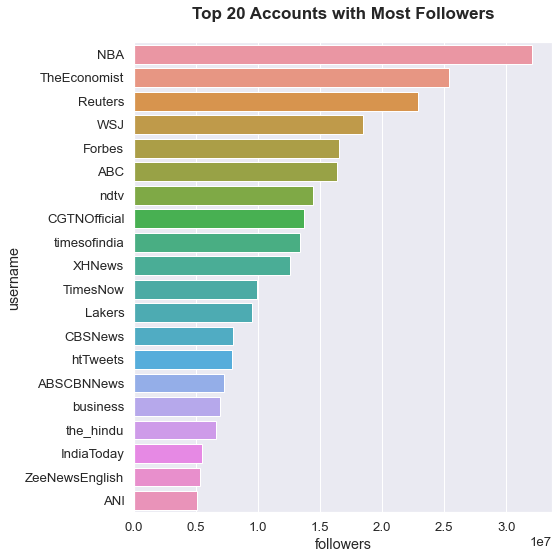

In [19]:
# Top 20 accounts with most followers
sns.set(font_scale=1.2)
fig = plt.subplots(figsize=(8,8))
bar = sns.barplot(data=most_followers, x='followers', y=most_followers.index)
bar.set_title('Top 20 Accounts with Most Followers\n', fontsize=17, fontweight='bold')
plt.tight_layout()
plt.savefig(os.getcwd()+'/figures/'+'top20followers.png')
plt.show()

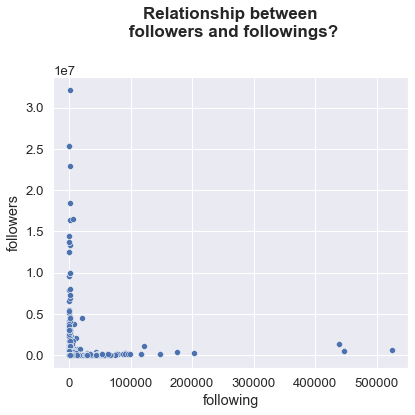

In [20]:
# any correlation between number of followers and followings?
sns.set(font_scale=1.2)
fig = plt.subplots(figsize=(6,6))
sns.scatterplot(data=corpus_df, x='following', y='followers').set_title('Relationship between\n followers and followings?\n\n', 
                                                                        fontsize=17, fontweight='bold')
plt.tight_layout()
plt.savefig(os.getcwd()+'/figures/'+'followingvsfollowers.png')
plt.show()

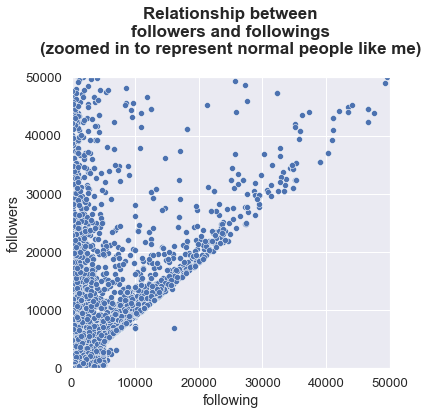

In [21]:
# how about when the plot is zoomed in?
sns.set(font_scale=1.2)
fig = plt.subplots(figsize=(6,6))
g = sns.scatterplot(data=corpus_df, x='following', y='followers').set_title('Relationship between\nfollowers and followings\n(zoomed in to represent normal people like me)\n', 
                                                                            fontweight='bold', fontsize=17)
plt.ylim(0, 50000)
plt.xlim(0, 50000)
plt.tight_layout()
plt.savefig(os.getcwd()+'/figures/'+'followingvsfollowers_public.png')
plt.show()

#### Findings :
Among tweets about COVID19 vaccines:
- the user with the most followers is NBA
- the users with more than 5 million followers are mostly news channels
- relationship between followers and followings:
    - Accounts with more than 5 million followers tend to have relatively low number of followings
    - However, when the plot is zoomed into less than 50,000 followers and followings (represents general public), positive linear correlation is observed.
    - For general public, followers tend to increase when following increase, vice versa, but causation is not identified.

## Sentiment Analysis
- Polarity: 
    - Range from -1 to +1
    - Closer +1, more positive
    - Closer to -1, more negative
- Subjectivity:
    - Range from 0 to +1
    - Closer to 0, more objective
    - Closer to 1, more subjective
    
    
- For the sentiment analysis, average polarity and subjectivity will be analyzed for three groups to gain overall sentiment for each group:
    1. Entire dataset
    2. Influencers with greater than or equal to 50,000 followers
    3. General public with less than 50,000 followers
    
- Assumptions:
    - Polarity greater than 0 is categorized as positive
    - Polarity less than 0 is categorized as negative
    - Polarity equal to 0 is categorized as neutral
    - User is assumed to be an influencer if number of followers is greater than or equal to 50,000
    - User is assumed to be a non-influencer if number of followers is less than 50,000

In [22]:
def polar_generator(text):
    polarity = TextBlob(text).sentiment.polarity
    
    return polarity

In [23]:
def subj_generator(text):
    subjectivity = TextBlob(text).sentiment.subjectivity
    
    return subjectivity

In [24]:
def sentiment_generator(polarity):
    if polarity == 0:
        sentiment = 'Neutral'
    elif polarity < 0:
        sentiment = 'Negative'
    elif polarity > 0:
        sentiment = 'Positive'
        
    return sentiment

In [25]:
def influencer_identifier(followers):
    if followers >= 50000:
        influencer = 1
    else:
        influencer = 0
        
    return influencer

In [26]:
# generate polarity and subjectivity
corpus_df['polarity'] = corpus_df['text'].apply(lambda x: polar_generator(x))
corpus_df['subjectivity'] = corpus_df['text'].apply(lambda x: subj_generator(x))

In [27]:
# categorize polarity into sentiments (positive, negative, neutral)
# Positive: polarity > 0
# Neutral: polarity == 0
# Negatvie: polarity < 0
corpus_df['sentiment'] = corpus_df['polarity'].apply(lambda x: sentiment_generator(x))

In [28]:
# identify if the user is influencer or not
# influencer == 1: influencer (followers >= 50000)
# influencer == 0: non-influencer (followers < 50000)
corpus_df['influencer'] = corpus_df['followers'].apply(lambda x: influencer_identifier(x))
corpus_df.head()

,username,following,followers,totaltweets,tweetcreated,retweetcount,text,hashtags,polarity,subjectivity,sentiment,influencer
0,KittyKunoichi,275,43,3901,2021-01-17 16:33:50,1705,as more vaccine becomes available more groups ...,"[{'text': 'COVID19', 'indices': [20, 28]}]",0.480000,0.505000,Positive,0
1,reillyd123,239,11,3158,2021-01-17 16:33:49,0,in the history of stupidity this johnson gover...,[],-0.010000,0.430000,Negative,0
2,RAJESH21490629,236,29,14211,2021-01-17 16:33:48,735,india is the vaccine hub of the world we have ...,[],0.334091,0.538636,Positive,0
3,CG_Cynic,950,355,33807,2021-01-17 16:33:47,4,the sunk costs of failed plans devised by larg...,[],0.056190,0.412381,Positive,0
4,NayayoungIndia,1145,1459,449459,2021-01-17 16:33:47,223,indias ready to prove its a vaccination superp...,[],0.316667,0.583333,Positive,0


In [29]:
# Entire data
print('Number of total tweets: {}'.format(len(corpus_df)))
print('Average Polarity: {}'.format(round(sum(corpus_df.polarity)/len(corpus_df), 4)))
print('Average Subjectivity: {}'.format(round(sum(corpus_df.subjectivity)/len(corpus_df), 4)))

Number of total tweets: 45000
Average Polarity: 0.101
Average Subjectivity: 0.399


In [30]:
# influencers with greater than or equal to 50,000 followers
influencers = corpus_df[corpus_df['influencer']==1]

In [31]:
print('Number of Influencers: {}'.format(len(influencers)))
print('Average Polarity of Influencers: {}'.format(round(sum(influencers.polarity)/len(influencers), 4)))
print('Average Subjectivity of Influencers: {}'.format(round(sum(influencers.subjectivity)/len(influencers), 4)))

Number of Influencers: 663
Average Polarity of Influencers: 0.1126
Average Subjectivity of Influencers: 0.3711


In [32]:
# general public with less than 50,000 followers
general_public = corpus_df[corpus_df['influencer']==0]

In [33]:
print('Number of Public: {}'.format(len(general_public)))
print('Average Polarity of General Public: {}'.format(round(sum(general_public.polarity)/len(general_public), 4)))
print('Average Subjectivity of General Public: {}'.format(round(sum(general_public.subjectivity)/len(general_public), 4)))

Number of Public: 44337
Average Polarity of General Public: 0.1009
Average Subjectivity of General Public: 0.3994


### Visualization

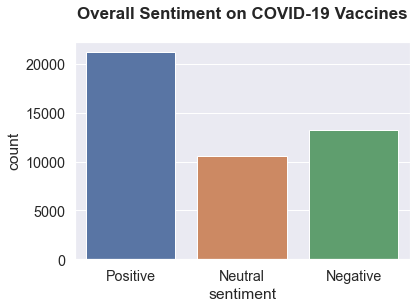

In [34]:
# count of sentiments over entire dataset
labels = ['Positive', 'Neutral', 'Negative']
sns.set(font_scale=1.3)
ax = sns.countplot(data=corpus_df, x='sentiment', order=labels)
ax.set_title('Overall Sentiment on COVID-19 Vaccines\n', fontsize=17, fontweight='bold')
plt.show()

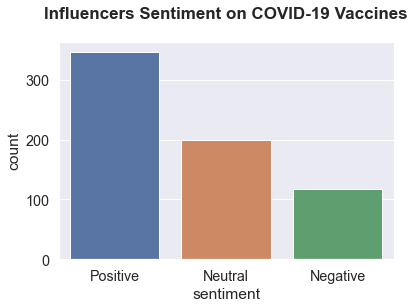

In [35]:
# count of sentiments among influencers
sns.set(font_scale=1.3)
ax = sns.countplot(data=influencers, x='sentiment', order=labels)
ax.set_title('Influencers Sentiment on COVID-19 Vaccines\n', fontsize=17, fontweight='bold')
plt.show()

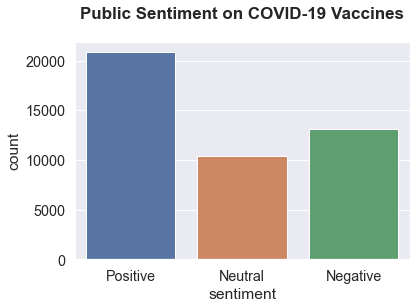

In [36]:
# count of sentiments among general public
sns.set(font_scale=1.3)
ax = sns.countplot(data=general_public, x='sentiment', order=labels)
ax.set_title('Public Sentiment on COVID-19 Vaccines\n', fontsize=17, fontweight='bold')
plt.show()

In [37]:
# calculate percentage by grouping by sentiments
sentiment_count = corpus_df.groupby('sentiment')['text'].count().reset_index(name='count')
sentiment_count['percentage'] = round(100 * sentiment_count['count'] / sentiment_count['count'].sum(), 2)
sentiment_count

,sentiment,count,percentage
0,Negative,13214,29.36
1,Neutral,10602,23.56
2,Positive,21184,47.08


In [38]:
# compare sentiments between influencers and general public
sentiment_comparison = corpus_df.groupby(['influencer', 'sentiment']).agg({'text':'count'})
sentiment_comparison = sentiment_comparison.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
sentiment_comparison.set_index('influencer', inplace=True)
sentiment_comparison

,sentiment,text
influencer,,
0,Negative,29.539662
0,Neutral,23.461217
0,Positive,46.999120
1,Negative,17.647059
1,Neutral,30.165913
1,Positive,52.187029


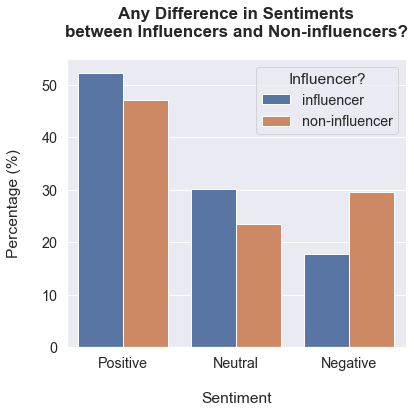

In [61]:
sns.set(font_scale=1.3)
fig = plt.subplots(figsize=(6,6))
ax = sns.barplot(data=sentiment_comparison, x='sentiment', y='text', hue=sentiment_comparison.index, 
            order=['Positive', 'Neutral', 'Negative'], hue_order=[1, 0])
ax.set_ylabel('Percentage (%)\n')
ax.set_xlabel('\nSentiment')
ax.set_title('Any Difference in Sentiments\nbetween Influencers and Non-influencers?\n', fontsize=17, fontweight='bold')

labels = ['influencer', 'non-influencer']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Influencer?")
plt.tight_layout()
plt.savefig(os.getcwd()+'/figures/'+'sentiment_comparison.png')
plt.show()

### Insights
- Overall, 21184 (47.08%) tweets were positive, 10602 (23.56%) were neutral, 13214 (29.36%) were negative about COVID-19 vaccines.
- The dataset is then divided into two subgroups, influencers and non-influencers, based on the followers to observe any difference in sentiments between influencers and non-influencers (general public). 
    - Influencers tend to post positive and neutral tweets about COVID-19 vaccines.
    - Percentage of negative tweets from non-influencers almost double the influencers.

### Additional Sentiment Analysis for tweets without retreets
- This step is added to reduce duplicate tweets by removing retweets
- Analysis steps are identical as above

In [612]:
## Collect data again, this time filter out retweets
# initialize variables
keywords = '#vaccines OR #coronavaccines OR vaccines OR covid19+vaccines' + ' -filter:retweets'
date_since = '2021-01-18'
numTweets = 2500
numRuns = 6

# call the function
scrape_tweets_to_csv(keywords, date_since, numTweets, numRuns)

Number of tweets scraped for 1 run is 2500
Duration of 1 run is 1.66
Number of tweets scraped for 2 run is 2500
Duration of 2 run is 1.58
Number of tweets scraped for 3 run is 2500
Duration of 3 run is 1.63
Number of tweets scraped for 4 run is 2500
Duration of 4 run is 1.7
Number of tweets scraped for 5 run is 2500
Duration of 5 run is 1.85
Number of tweets scraped for 6 run is 2500
Duration of 6 run is 1.91
Scraping Complete
Duration of the program: 102.32


In [40]:
# load all csv and create a dataframe
data_path = os.getcwd() + '/noretweet_data/'
filenames = glob.glob(data_path + '/*.csv')
noretweet_df = []
for filename in filenames:
    noretweet_df.append(pd.read_csv(filename))

noretweet_df = pd.concat(noretweet_df, ignore_index = True)
print(noretweet_df.shape)

(15000, 8)


In [41]:
noretweet_df.describe()

,following,followers,totaltweets,retweetcount
count,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,1407.323200,8.998657e+04,3.440394e+04,1.187000
std,3403.357243,1.282179e+06,9.558778e+04,19.845477
min,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,160.000000,8.000000e+01,1.518000e+03,0.000000
50%,504.000000,4.545000e+02,7.034000e+03,0.000000
75%,1345.250000,2.385000e+03,2.564375e+04,0.000000
max,91412.000000,6.493206e+07,1.606005e+06,1401.000000


In [42]:
noRT_corpus_df = noretweet_df
noRT_corpus_df.describe()

,following,followers,totaltweets,retweetcount
count,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,1407.323200,8.998657e+04,3.440394e+04,1.187000
std,3403.357243,1.282179e+06,9.558778e+04,19.845477
min,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,160.000000,8.000000e+01,1.518000e+03,0.000000
50%,504.000000,4.545000e+02,7.034000e+03,0.000000
75%,1345.250000,2.385000e+03,2.564375e+04,0.000000
max,91412.000000,6.493206e+07,1.606005e+06,1401.000000


In [43]:
# clean data
noRT_corpus_df['text'] = noRT_corpus_df['text'].apply(lambda x: clean_text(x))
noRT_corpus_df['text'] = noRT_corpus_df['text'].apply(lambda x: remove_special_punc(x))

In [44]:
# generate polarity and subjectivity
noRT_corpus_df['polarity'] = noRT_corpus_df['text'].apply(lambda x: polar_generator(x))
noRT_corpus_df['subjectivity'] = noRT_corpus_df['text'].apply(lambda x: subj_generator(x))

In [45]:
# categorize polarity into positive, negative, neutral
# categorize followers into influencer or not (1: influencer, 0: general public)
noRT_corpus_df['sentiment'] = noRT_corpus_df['polarity'].apply(lambda x: sentiment_generator(x))
noRT_corpus_df['influencer'] = noRT_corpus_df['followers'].apply(lambda x: influencer_identifier(x))
noRT_corpus_df.head()

,username,following,followers,totaltweets,tweetcreated,retweetcount,text,hashtags,polarity,subjectivity,sentiment,influencer
0,coffeemadman,3083,4600,19579,2021-01-18 16:13:50,0,oh i see i think the vaccines are mostly handl...,[],0.100000,0.2750,Positive,0
1,HealthWorksBC,6692,6088,32866,2021-01-18 16:13:48,0,vaccine nationalism puts world on brink of cat...,"[{'text': 'morality', 'indices': [122, 131]}, ...",-0.158333,0.2750,Negative,0
2,Aly_Meek,1421,1329,15218,2021-01-18 16:13:45,0,ah ive just checked out your tweets we really ...,[],0.175000,0.4875,Positive,0
3,tdpeyton2019,237,6,7,2021-01-18 16:13:45,0,when will the allegheny county health departme...,[],0.400000,0.4000,Positive,0
4,notdred,681,8547,50508,2021-01-18 16:13:44,0,yes i think the emphasis should be on getting ...,[],0.200000,0.6600,Positive,0


In [46]:
# entire data (no retweets)
print('Number of total tweets (no retweets): {}'.format(len(noRT_corpus_df)))
print('Average Polarity: {}'.format(round(sum(noRT_corpus_df.polarity)/len(noRT_corpus_df),4)))
print('Average Subjectivity: {}'.format(round(sum(noRT_corpus_df.subjectivity)/len(noRT_corpus_df),4)))

Number of total tweets (no retweets): 15000
Average Polarity: 0.0834
Average Subjectivity: 0.3991


In [47]:
# influencers with greater than or equal to 50,000 followers
noRT_influencers = noRT_corpus_df[noRT_corpus_df['influencer']==1]

In [48]:
print('Number of Influencers (no retweets): {}'.format(len(noRT_influencers)))
print('Average Polarity of Influencers: {}'.format(round(sum(noRT_influencers.polarity)/len(noRT_influencers),4)))
print('Average Subjectivity of Influencers: {}'.format(round(sum(noRT_influencers.subjectivity)/len(noRT_influencers),4)))

Number of Influencers (no retweets): 691
Average Polarity of Influencers: 0.1143
Average Subjectivity of Influencers: 0.3506


In [49]:
# general public with less than 50,000 followers
noRT_general_public = noRT_corpus_df[noRT_corpus_df['influencer']==0]

In [50]:
print('Number of Public (no retweets): {}'.format(len(noRT_general_public)))
print('Average Polarity: {}'.format(round(sum(noRT_general_public.polarity)/len(noRT_general_public),4)))
print('Average Subjectivity: {}'.format(round(sum(noRT_general_public.subjectivity)/len(noRT_general_public),4)))

Number of Public (no retweets): 14309
Average Polarity: 0.0819
Average Subjectivity: 0.4014


### Visualization

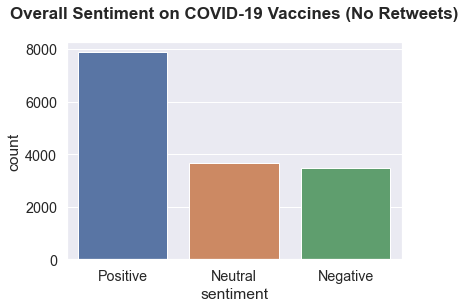

In [57]:
labels = ['Positive', 'Neutral', 'Negative']
sns.set(font_scale=1.3)
ax = sns.countplot(data=noRT_corpus_df, x='sentiment', order=labels)
ax.set_title('Overall Sentiment on COVID-19 Vaccines (No Retweets)\n', fontsize=17, fontweight='bold')
plt.show()

In [52]:
noRT_sentiment_count = noRT_corpus_df.groupby('sentiment')['text'].count().reset_index(name='count')
noRT_sentiment_count['percentage'] = round(100 * noRT_sentiment_count['count'] / noRT_sentiment_count['count'].sum(), 2)
noRT_sentiment_count

,sentiment,count,percentage
0,Negative,3471,23.14
1,Neutral,3651,24.34
2,Positive,7878,52.52


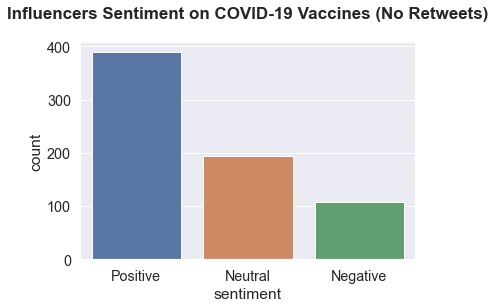

In [58]:
sns.set(font_scale=1.3)
ax = sns.countplot(data=noRT_influencers, x='sentiment', order=labels)
ax.set_title('Influencers Sentiment on COVID-19 Vaccines (No Retweets)\n', fontsize=17, fontweight='bold')
plt.show()

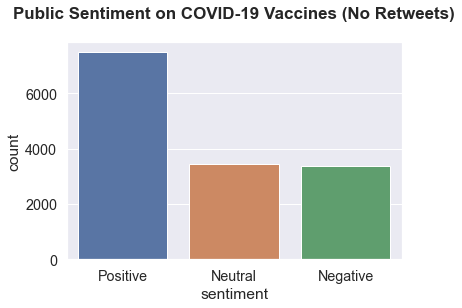

In [59]:
sns.set(font_scale=1.3)
ax = sns.countplot(data=noRT_general_public, x='sentiment', order=labels)
ax.set_title('Public Sentiment on COVID-19 Vaccines (No Retweets)\n', fontsize=17, fontweight='bold')
plt.show()

In [55]:
noRT_sentiment_comparison = noRT_corpus_df.groupby(['influencer', 'sentiment']).agg({'text':'count'})
noRT_sentiment_comparison = noRT_sentiment_comparison.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
noRT_sentiment_comparison.set_index('influencer', inplace=True)

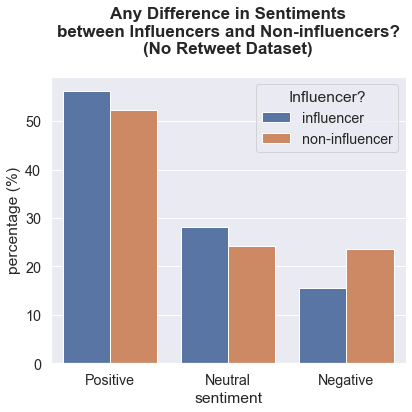

In [60]:
sns.set(font_scale=1.3)
fig = plt.subplots(figsize=(6,6))
ax = sns.barplot(data=noRT_sentiment_comparison, x='sentiment', y='text', hue=noRT_sentiment_comparison.index, 
            order=['Positive', 'Neutral', 'Negative'], hue_order=[1,0])
ax.set_ylabel('percentage (%)')
ax.set_title('Any Difference in Sentiments\nbetween Influencers and Non-influencers?\n(No Retweet Dataset)\n', fontsize=17, fontweight='bold')

labels = ['influencer', 'non-influencer']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Influencer?")
plt.tight_layout()
plt.savefig(os.getcwd()+'/figures/'+'sentiment_comparison_noretweet.png')
plt.show()

### Insights

- Similar result is observed as original data


## Future Work & Notes
- Clean text further (foreign language and special punctuation still exist)
- Try to increase the range of 'Neutral' and observe the result:
    - Currently, 'Neutral' is assumed to be polarity == 0.
    - However, the range can be increased to, for example, -0.1 to 0.1 as they are weak positive and negative
- Althogh the result shows majority of sentiments are positive, the magnitude of positivity is small (approximately 0.1)